# XGBoost Practise 

In [1]:
from sklearn.model_selection import train_test_split 
#split data into training
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, 
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix, make_scorer 
# creates a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay 
# draws a confusion matrix
import numpy as np # calculate the mean and standard deviation
import xgboost as xgb # XGBoost stuff
import pandas as pd # load and manipulate data and for One-Hot Encoding

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.drop(["customerID"],axis=1,inplace=True) 

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Missing Data

In [11]:
df.columns = df.columns.str.replace(" ","_")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df["TotalCharges"].unique() 
# Why this is object? Need to convert these to float

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [16]:
len(df.loc[df["TotalCharges"]==" "])

11

In [17]:
df.loc[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [18]:
df.loc[(df["TotalCharges"]==" "),"TotalCharges"] = 0

In [19]:
df.loc[df["tenure"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [21]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
df["TotalCharges"].dtypes

dtype('float64')

In [22]:
df.replace(" ","_",regex=True,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


# Format Data

In [27]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1


In [28]:
X = df.drop('Churn', axis=1).copy()
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65


In [29]:
y = df["Churn"].copy()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# One-Hot Encoding 

In [30]:
X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [38]:
pd.get_dummies(X,columns=["PaymentMethod"]).head() 
# XGBoost work with only numeric data, 
# so we changed categorical data to numeric

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,...,No,No,Month-to-month,Yes,29.85,29.85,0,0,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One_year,No,56.95,1889.50,0,0,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,...,No,No,One_year,No,42.30,1840.75,1,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,...,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0


In [41]:
X_encoded2 = pd.get_dummies(X,columns=['PaymentMethod','gender', 'Partner',
    'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling'])
X_encoded2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,gender_Female,gender_Male,...,StreamingTV_No_internet_service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes
0,0,1,29.85,29.85,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,0,34,56.95,1889.50,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
2,0,2,53.85,108.15,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
4,0,2,70.70,151.65,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [40]:
y.unique()

array([0, 1], dtype=int64)

# Preliminary XGBoost Model

In [42]:
sum(y)/len(y)

0.2653698707936959

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded2, y,
                                            random_state=42, stratify=y)

In [45]:
sum(y_train)/len(y_train)

0.2654297614539947

In [46]:
sum(y_test)/len(y_test)

0.26519023282226006

In [52]:
import xgboost
print(xgboost.__version__)

2.1.1


In [53]:
pip install xgboost --upgrade

In [60]:
import xgboost as xgb

# Initialize the XGBClassifier
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            seed=42)

# Fit the model with early stopping and evaluation metric
clf_xgb.fit(
    X_train, 
    y_train, 
    eval_set=[(X_test, y_test)],  # Evaluation set for early stopping
    verbose=True                  # Verbose to show the progress
)


[0]	validation_0-logloss:0.50438
[1]	validation_0-logloss:0.46820
[2]	validation_0-logloss:0.44885
[3]	validation_0-logloss:0.43785
[4]	validation_0-logloss:0.42992
[5]	validation_0-logloss:0.42617
[6]	validation_0-logloss:0.42361
[7]	validation_0-logloss:0.42269
[8]	validation_0-logloss:0.42417
[9]	validation_0-logloss:0.42541
[10]	validation_0-logloss:0.42557
[11]	validation_0-logloss:0.42540
[12]	validation_0-logloss:0.42635
[13]	validation_0-logloss:0.42534
[14]	validation_0-logloss:0.42625
[15]	validation_0-logloss:0.42691
[16]	validation_0-logloss:0.42669
[17]	validation_0-logloss:0.42770
[18]	validation_0-logloss:0.42865
[19]	validation_0-logloss:0.42931
[20]	validation_0-logloss:0.43004
[21]	validation_0-logloss:0.43080
[22]	validation_0-logloss:0.43274
[23]	validation_0-logloss:0.43308
[24]	validation_0-logloss:0.43378
[25]	validation_0-logloss:0.43401
[26]	validation_0-logloss:0.43388
[27]	validation_0-logloss:0.43495
[28]	validation_0-logloss:0.43549
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

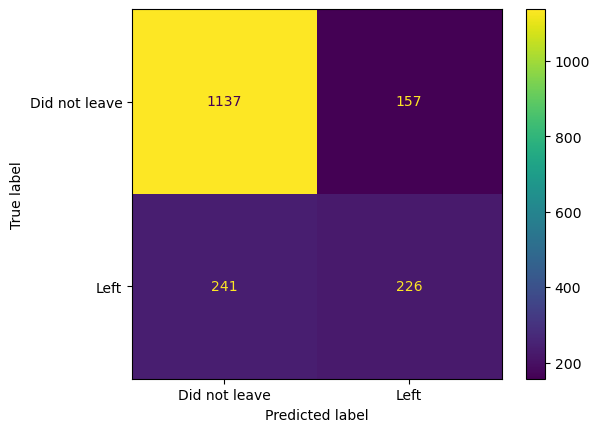

In [61]:
y_pred = clf_xgb.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=["Did not leave", "Left"])

# Use the plot method to render the display with a custom format
disp.plot(values_format='d')

# Optimize Parameters using CVC and GridSearch()

In [63]:
param_grid = {
'max_depth': [3, 4, 5],
'learning_rate': [0.1, 0.01, 0.05],
'gamma': [0, 0.25, 1.0],
'reg_lambda': [0, 1.0, 10.0],
'scale_pos_weight': [1, 3, 5]}

In [ ]:
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
                                param_grid = param_grid,
                                scoring="roc_auc",
                                verbose = 0, n_jobs = 10, cv = 3)

In [ ]:
optimal_params.fit(X_train, y_train,
                   early_stopping_rounds=10,
                   eval_metric='auc',
                   eval_set=[(X_test, y_test) ]
                   verbose=False)
print(optimal_params.best_params_)

In [ ]:
"""Output: 
max_depth: 4, learning_rate: 0.1, gamma: 0.25, reg_lambda: 10, 
scale_pos_weight: 3
"""

In [68]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.25,
                            learn_rate=0.1,
                            max_depth=4,
                            reg_lambda=10,
                            scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree=0.5)

clf_xgb.fit(X_train, y_train,
            verbose=True,
            eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.62787
[1]	validation_0-logloss:0.58277
[2]	validation_0-logloss:0.55653
[3]	validation_0-logloss:0.53664
[4]	validation_0-logloss:0.52410
[5]	validation_0-logloss:0.51591
[6]	validation_0-logloss:0.50809
[7]	validation_0-logloss:0.50689
[8]	validation_0-logloss:0.50113
[9]	validation_0-logloss:0.49899
[10]	validation_0-logloss:0.49710
[11]	validation_0-logloss:0.49447
[12]	validation_0-logloss:0.49395
[13]	validation_0-logloss:0.49411
[14]	validation_0-logloss:0.49423
[15]	validation_0-logloss:0.49204
[16]	validation_0-logloss:0.49209
[17]	validation_0-logloss:0.49195
[18]	validation_0-logloss:0.49088
[19]	validation_0-logloss:0.49064
[20]	validation_0-logloss:0.48932
[21]	validation_0-logloss:0.48926
[22]	validation_0-logloss:0.48854
[23]	validation_0-logloss:0.48832
[24]	validation_0-logloss:0.48866
[25]	validation_0-logloss:0.48883
[26]	validation_0-logloss:0.48953
[27]	validation_0-logloss:0.48991
[28]	validation_0-logloss:0.49044
[29]	validation_0-loglos

C:\Users\Huawei\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:42:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "learn_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[40]	validation_0-logloss:0.48932
[41]	validation_0-logloss:0.48990
[42]	validation_0-logloss:0.48909
[43]	validation_0-logloss:0.48950
[44]	validation_0-logloss:0.49110
[45]	validation_0-logloss:0.49205
[46]	validation_0-logloss:0.49121
[47]	validation_0-logloss:0.49110
[48]	validation_0-logloss:0.49153
[49]	validation_0-logloss:0.49171
[50]	validation_0-logloss:0.49248
[51]	validation_0-logloss:0.49177
[52]	validation_0-logloss:0.49112
[53]	validation_0-logloss:0.49161
[54]	validation_0-logloss:0.49176
[55]	validation_0-logloss:0.49154
[56]	validation_0-logloss:0.49269
[57]	validation_0-logloss:0.49219
[58]	validation_0-logloss:0.49243
[59]	validation_0-logloss:0.49140
[60]	validation_0-logloss:0.49016
[61]	validation_0-logloss:0.49057
[62]	validation_0-logloss:0.49079
[63]	validation_0-logloss:0.49093
[64]	validation_0-logloss:0.49172
[65]	validation_0-logloss:0.49108
[66]	validation_0-logloss:0.49099
[67]	validation_0-logloss:0.49118
[68]	validation_0-logloss:0.49076
[69]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learn_rate=0.1, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

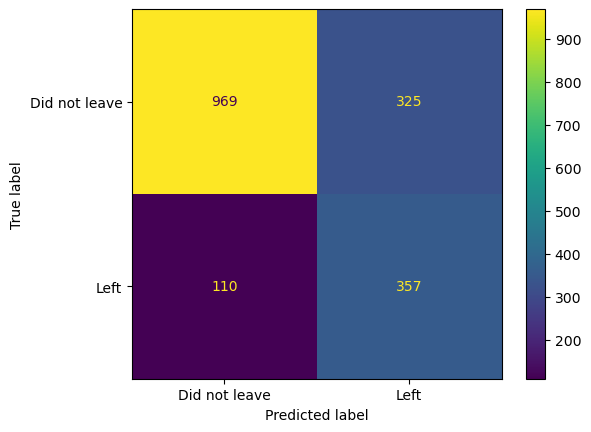

In [69]:
y_pred = clf_xgb.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=["Did not leave", "Left"])

# Use the plot method to render the display with a custom format
disp.plot(values_format='d')

In [70]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.25,
                            learn_rate=0.1,
                            max_depth=4,
                            reg_lambda=10,
                            scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree=0.5,
                            n_estimators=1) 
## We set this to 1 so we can get gain, cover etc.)
clf_xgb.fit(X_train, y_train)

C:\Users\Huawei\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:44:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "learn_rate" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learn_rate=0.1, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1, n_jobs=None,
              num_parallel_tree=None, ...)

In [71]:
bst = clf_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 
                        'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=
                                                  importance_type) )

node_params = {'shape': 'box', ## make the nodes fancy
'style': 'filled, rounded',
'fillcolor': '#78cbe'}
leaf_params = {'shape': 'box',
'style': 'filled',
'fillcolor': '#e48038'}

weight:  {'MonthlyCharges': 3.0, 'TotalCharges': 4.0, 'PaymentMethod_Electronic_check': 2.0, 'InternetService_Fiber_optic': 1.0, 'OnlineBackup_No_internet_service': 1.0, 'Contract_Month-to-month': 1.0, 'Contract_Two_year': 2.0}
gain:  {'MonthlyCharges': 37.98822021484375, 'TotalCharges': 52.57297134399414, 'PaymentMethod_Electronic_check': 31.347272872924805, 'InternetService_Fiber_optic': 285.3604736328125, 'OnlineBackup_No_internet_service': 45.48839569091797, 'Contract_Month-to-month': 1611.381591796875, 'Contract_Two_year': 25.29827880859375}
cover:  {'MonthlyCharges': 359.9978942871094, 'TotalCharges': 377.94781494140625, 'PaymentMethod_Electronic_check': 318.35723876953125, 'InternetService_Fiber_optic': 1200.5474853515625, 'OnlineBackup_No_internet_service': 170.22315979003906, 'Contract_Month-to-month': 1814.0496826171875, 'Contract_Two_year': 306.7511291503906}
total_gain:  {'MonthlyCharges': 113.96466064453125, 'TotalCharges': 210.29188537597656, 'PaymentMethod_Electronic_che

In [74]:
pip install graphviz

In [75]:
import graphviz # To graph the tree, need to install graphviz...

In [78]:
## xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10")
xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)